In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model
import pysam


import sys
sys.path.insert(0, '../api_tutorials')

from bqsr_cnn import parse_args, read_to_bqsr_tensor, bqsr_get_metric_dict, bqsr_bed_file_to_dict, get_forward_oq

In [2]:
### Manually edit the following files
model_file = '/home/tsato/dsde-deep-learning/weights/bqsr_anno_try_6x128_lw09_p50.hd5'
sam_file = '/home/tsato/bam/NA12878.bam'
ignore_vcf = '/home/tsato/auxiliary/nist_na12878_minimal.vcf.gz'
bed_file = '/home/tsato/auxiliary/union13callableMQonlymerged_addcert_nouncert_excludesimplerep_excludesegdups_excludedecoy_excludeRepSeqSTRs_noCNVs_v2.18_2mindatasets_5minYesNoRatio.bed'
reference = '/home/tsato/reference/Homo_sapiens_assembly19.fasta'

# functions in the bqsr_cnn suite expects the argument builder so do that here
sys.argv = ['bqsr_cnn']
args = parse_args()


model=load_model(model_file, custom_objects=bqsr_get_metric_dict(args.labels))
model.summary()
sam = pysam.AlignmentFile(sam_file, 'rb')

Arguments are Namespace(activation='relu', activity_weight=1.0, annotation_set='_', annotations=[], bam_file=None, base_quality_mode='phot', batch_size=32, bed_file=None, channels_last=False, chrom=None, conv_batch_normalize=False, conv_dropout=0.0, conv_layers=[128, 96, 64, 48], conv_widths=[5, 5, 5, 5], data_dir=None, downsample_perfect_reads=0.0, end_pos=0, epochs=25, fc_batch_normalize=False, fc_dropout=0.0, fc_initializer='glorot_normal', fc_layers=[32], fps=1, id='no_id', ignore_vcf=None, input_symbol_set='dna_annotations', input_symbols={'A': 0, 'C': 1, 'G': 2, 'T': 3, 'pair': 4, 'cycle': 5, 'mq': 6}, inspect_model=False, inspect_show_labels=False, iterations=5, jitter=0.0, kernel_initializer='glorot_normal', l1=0.0, l2=0.0, label_smoothing=0.0, label_weights=[0.5, 0.5], labels={'GOOD_BASE': 0, 'BAD_BASE': 1}, learning_rate=0.01, map_input_to_logspace=False, max_pools=[], maxfun=9, mode=None, model=None, out='recalibrated.bam', output_dir='./weights/', padding='same', patience=4

In [3]:
from collections import Counter
import vcf
from Bio import Seq, SeqIO

args.bam_file = sam_file
args.ignore_vcf = ignore_vcf
args.bed_file = bed_file
args.reference_fasta = reference
args.chrom = ['1','2']

stats = Counter()

In [4]:
samfile = pysam.AlignmentFile(args.bam_file, "rb")
vcf_ram = vcf.Reader(open(args.ignore_vcf, 'rb'))

bed_dict = bqsr_bed_file_to_dict(args.bed_file)
record_dict = SeqIO.to_dict(SeqIO.parse(args.reference_fasta, "fasta"))

In [13]:
from array import array

chrom = '1'
start = 100000
stop = 200000
for read in samfile.fetch(chrom, start, stop):
    # print(read.query_qualities)
    # print(read.query_qualities[::-1])
    oq=get_forward_oq(read)
    print(read.get_forward_qualities())
    print(read.get_forward_qualities()[-5:])
    print(28 in read.get_forward_qualities()[-5:])
    break
    oq=np.array([ord(elem) for elem in oq])-33
    print(array('b', oq))
    print(type(oq))
    print(read.get_forward_qualities())
type("ABCE".encode('ascii'))
print("TAKUTO")
print("TAKUTO"[::-1])

array('B', [29, 29, 28, 28, 31, 31, 30, 29, 29, 29, 29, 29, 29, 30, 29, 29, 30, 29, 29, 29, 24, 29, 29, 29, 29, 30, 30, 29, 29, 29, 29, 29, 29, 29, 30, 29, 30, 30, 29, 29, 29, 29, 29, 29, 30, 29, 29, 30, 29, 30, 29, 29, 29, 29, 29, 30, 29, 29, 29, 29, 29, 30, 29, 29, 29, 30, 29, 30, 29, 29, 29, 29, 30, 29, 29, 28, 29, 30, 30, 29, 29, 29, 29, 30, 29, 29, 29, 30, 28, 29, 29, 29, 29, 29, 29, 31, 30, 29, 30, 30, 30, 30, 29, 29, 29, 28, 30, 31, 30, 30, 30, 31, 30, 30, 29, 30, 30, 30, 29, 23, 31, 30, 30, 30, 31, 30, 30, 30, 31, 28, 27, 31, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 26, 31, 32, 30, 29, 27, 26, 26, 30])
array('B', [29, 27, 26, 26, 30])
False
TAKUTO
OTUKAT


In [24]:
margin = args.window_size
contigs = [ record_dict[c] for c in args.chrom ]
for c in args.chrom:
    for start,stop in zip(bed_dict[c][0], bed_dict[c][1]):
        if stop - start < args.window_size:
            stats['interval too small'] += 1
            continue
        last_variant = None
        for v in vcf_ram.fetch(c, start, stop):
            print(v)
        break

In [29]:
record_dict.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y', 'MT', 'GL000207.1', 'GL000226.1', 'GL000229.1', 'GL000231.1', 'GL000210.1', 'GL000239.1', 'GL000235.1', 'GL000201.1', 'GL000247.1', 'GL000245.1', 'GL000197.1', 'GL000203.1', 'GL000246.1', 'GL000249.1', 'GL000196.1', 'GL000248.1', 'GL000244.1', 'GL000238.1', 'GL000202.1', 'GL000234.1', 'GL000232.1', 'GL000206.1', 'GL000240.1', 'GL000236.1', 'GL000241.1', 'GL000243.1', 'GL000242.1', 'GL000230.1', 'GL000237.1', 'GL000233.1', 'GL000204.1', 'GL000198.1', 'GL000208.1', 'GL000191.1', 'GL000227.1', 'GL000228.1', 'GL000214.1', 'GL000221.1', 'GL000209.1', 'GL000218.1', 'GL000220.1', 'GL000213.1', 'GL000211.1', 'GL000199.1', 'GL000217.1', 'GL000216.1', 'GL000215.1', 'GL000205.1', 'GL000219.1', 'GL000224.1', 'GL000223.1', 'GL000195.1', 'GL000212.1', 'GL000222.1', 'GL000200.1', 'GL000193.1', 'GL000194.1', 'GL000225.1', 'GL000192.1', 'NC_007605'])

In [ ]:
def bqsr_tensor_to_bqs()

In [21]:
 # (num_reads, before/after, cycles)
num_reads_to_plot = 16
count = 0
i=0
j=0

plt.figure(figsize=(32,32), dpi=80)
start = int(1e6)
end = int(20e6)
num_discarded = 0
num_reads = 1000
s = np.zeros((num_reads, args.window_size))


for read in sam.fetch("1", start, end):
    if np.random.randn() < 1:
        num_discarded += 1
        continue
    if 'artificial' in read.get_tag('RG').lower():
        continue
    if not read.is_proper_pair or not read.is_paired:
        continue
    if read.is_duplicate or read.is_secondary or read.is_supplementary or read.is_qcfail or read.is_unmapped:
        continue
    if "S" in read.cigarstring:
        continue
    tensor = read_to_bqsr_tensor(read, args)
    output = np.squeeze(model.predict(np.expand_dims(tensor, axis=0)))
    i=0
    s_i = output[:, args.labels['GOOD_BASE']]
    s[i] = s_i
    i = i+1
    if i >= num_reads:
        break
    

    
    

NameError: name 'bqsr_tensor_to_bqs' is not defined

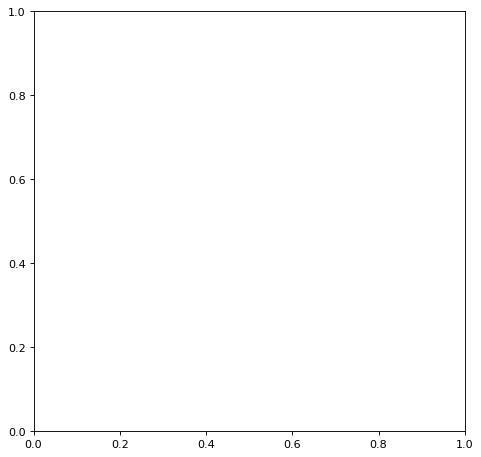

In [6]:
for read in sam.fetch("1", start, end):
    if np.random.randn() < 1:
        num_discarded += 1
        continue
    if 'artificial' in read.get_tag('RG').lower():
        continue
    if not read.is_proper_pair or not read.is_paired:
        continue
    if read.is_duplicate or read.is_secondary or read.is_supplementary or read.is_qcfail or read.is_unmapped:
        continue
    if "S" in read.cigarstring:
        continue
    tensor = read_to_bqsr_tensor(read, args)
    recalibrated_tensor = model.predict(np.expand_dims(tensor, axis=0))
    plt.subplot(4, 4, i)
    before = read.query_qualities
    after = bqsr_tensor_to_bqs(np.squeeze(recalibrated_tensor), args) # after
    plt.plot(np.arange(151), before, label = "before")
    plt.plot(np.arange(151), after, label = "after")
    plt.legend()
    plt.title(read.pos)
    i += 1
    if i > num_reads_to_plot:
        break
    # recalibrated_read = bqsr_tensor_to_read(tensor, args)
print(i)
print(num_discarded)

In [70]:
import os
import h5py

args.batch_size = 2
tensor = np.zeros((args.batch_size, args.window_size, len(args.input_symbols)))
label_matrix = np.zeros((args.batch_size, args.window_size, len(args.labels)))


train_dir="/home/tsato/data/tensors/bqsr_forward/train/"
train_paths = [train_dir + tp for tp in os.listdir(train_dir)]
i=0
for tp in train_paths:
    if i >= args.batch_size:
        break
    try:
        with h5py.File(tp, 'r') as hf:
            tensor[i] = np.array(hf.get(args.tensor_name))
            use_log_input = True
            if use_log_input:
                log_tmp = np.log(tensor[i,:,:4])
                tensor[i,:,:4] = log_tmp
            label_matrix[i] = np.array(hf.get('bqsr_labels'))
            i = i+1
    except Exception as e:
        print('Exception for tensor at:', tp, '\n\n\nError is:', str(e))
        print('Expected tensor shape:', (args.batch_size, args.window_size, len(args.input_symbols))) #, 'but received shape:', np.array(hf.get('read_tensor')).shape)
        print('Expected site labels shape:',(args.window_size, len(args.labels))) #, 'received:', np.array(hf.get('site_labels')).shape)
        raise Exception('bad tensor')
        #continue
    

In [77]:
np.sum(tensor, axis = (1,2)) 

array([-3062.35420723, -3048.5968648 ])